# Import 

## Librairies

In [5]:
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
#import xgboost as xgb
import lightgbm as lgb
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import pandas as pd

## Data

In [12]:
df = pickle.load( open( "/Users/patrickmacclenihan/Desktop/final_project/JP notebooks/train_data_ready", "rb" ) )

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19693 entries, 0 to 19692
Columns: 300 entries, Distance (KM) to Destination_Id_72
dtypes: float64(13), int64(12), uint8(275)
memory usage: 9.1 MB


In [14]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print("Categorical variables are  : \n", categorical)

There are 0 categorical variables

Categorical variables are  : 
 []


# Train Test Split

In [15]:
X = df.drop("Time from Pickup to Arrival" , axis = 1 )
y = df["Time from Pickup to Arrival"]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Models 

## XGboost

In [ ]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', random_state = 42)
xgb_reg.fit(X_train,y_train)

preds = xgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [ ]:
#cross_val_score(estimator=xg_reg , X=X_train, y=y_train, cv=5, scoring='neg_root_mean_squared_error').mean()

### optimization of the model 

In [ ]:
param_grid_xgb = { 
    'colsample_bytree' : np.random.randint(1000, size=30)/1000, 
   'learning_rate' : np.random.randint(1000, size=30)/1000,
    'max_depth' : np.random.randint(100, size=30) ,
   'alpha' :  np.random.randint(30, size=30), 
}

In [ ]:
nb_POINTS_TO_TEST = 200

xgb_rs = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions = param_grid_xgb , 
    n_iter=nb_POINTS_TO_TEST,
    scoring='neg_root_mean_squared_error',
    cv=5,
    refit=True,
    random_state=42,
    verbose=1000)

search_xgb = xgb_rs.fit(X_train, y_train)


In [ ]:
search_xgb.best_params_

In [ ]:
[0.05,0.05]

In [ ]:
train = []
test= []

for i in np.arange(100,500,50):
    xgb_optimal =  xgb.XGBRegressor(n_estimators= i, objective ='reg:linear', max_depth = 2,
     learning_rate= 0.05,
     colsample_bytree = 0.526 ,
     alpha= 21 )
    xgb_optimal.fit(X_train,y_train)
    pred_train = xgb_optimal.predict(X_train)
    preds = xgb_optimal.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(pred_train, y_train)) 
    rmse_test = np.sqrt(mean_squared_error(y_test, preds))
    
    train.append(rmse_train)
    test.append(rmse_test)

In [ ]:
plt.plot(np.arange(100,500,50) , train)
plt.plot(np.arange(100,500,50) , test, label = "test")
plt.legend()
#plt.plot([0.05,0.05], [250,1500])


In [ ]:
xgb_optimal.fit(X_train,y_train)
pred_train = xgb_optimal.predict(X_train)
preds = xgb_optimal.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(pred_train, y_train)) 
rmse_test = np.sqrt(mean_squared_error(y_test, preds))


In [ ]:
print("RMSE_train: %f" % (rmse_train))
print("RMSE_test: %f" % (rmse_test))
print((rmse_train - rmse_test)/ rmse_test *100)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.8)
ridge.fit((X_train), y_train)
y_train_pred = ridge.predict(np.sort(X_train))


In [ ]:
y_train_pred

In [ ]:

# features importance
indices = np.argsort(xg_reg.feature_importances_)

plt.figure(figsize=(15, 50))
plt.barh(range(len(indices)), np.sort(rfr.feature_importances_[indices]), align='center')
plt.xlabel("Gain")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()

## LIGHT GBM 

Result : 
    With Uber : 665

In [8]:
lgbm = lgb.LGBMRegressor( random_state = 42, n_estimators = 5000, silent = True)

In [9]:
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
### STRIP_START

NameError: name 'X_train' is not defined

### Optimization of the model 

In [ ]:
param_grid = {    "num_leaves" : np.random.randint(500, size=30),    
                  "max_depth" : np.random.randint(100, size=30),
                 'learning_rate' : np.random.randint(1000, size=30)/1000,
                 "subsample_for_bin" :np.random.randint(2000000, size=30),
                 'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
                 'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
    }

In [ ]:
nb_POINTS_TO_TEST = 200

gs = RandomizedSearchCV(
    estimator=lgbm, param_distributions = param_grid , 
    n_iter=nb_POINTS_TO_TEST,
    scoring='neg_root_mean_squared_error',
    cv=5,
    refit=True,
    random_state=42,
    verbose=1000)

In [ ]:
gs.fit(X_train, y_train)

gs.best_params_, gs.best_score_

({'subsample_for_bin': 1262234,
  'reg_lambda': 50,
  'reg_alpha': 7,
  'num_leaves': 18,
  'n_estimators': 37,
  'max_depth': 81,
  'learning_rate': 0.212},
 -675.3750578636817)

#  Model on Test 

## Import Data 

In [16]:
test = pickle.load( open( "/Users/patrickmacclenihan/Desktop/final_project/JP notebooks/test_data_ready", "rb" ) )

In [60]:
#Order columns in the same way for Train & Test
test = test[X.columns]

In [17]:
lgbm_optimized = lgb.LGBMRegressor(subsample_for_bin= 1262234,
                                   reg_lambda = 50,
                                   reg_alpha =  7, 
                                   num_leaves =  18, 
                                   n_estimators =  37, 
                                   max_depth =  81,
                                   learning_rate =  0.212,
                                   random_state = 42, 
                                   silent = True)

In [18]:
lgbm_model = lgbm_optimized.fit(X, y) #model 
pred = lgbm_optimized.predict(test)

629

In [39]:
import shap

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


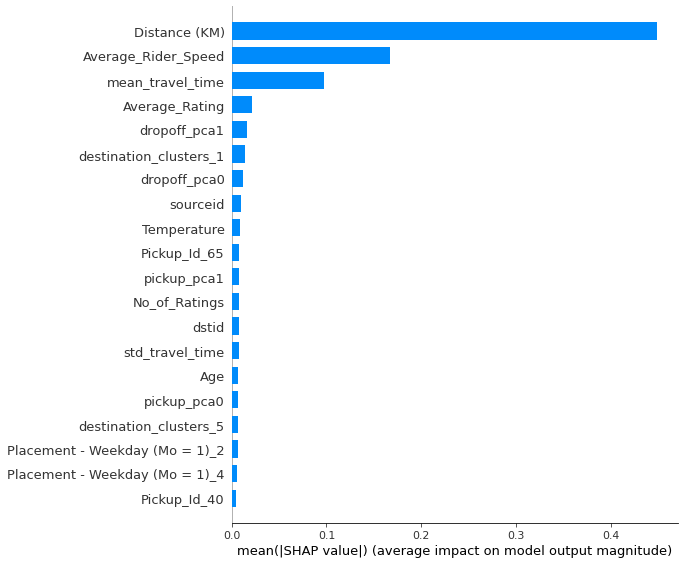

In [42]:
shap.initjs()
explainer = shap.TreeExplainer(lgbm_optimized)
shap_values = explainer.shap_values(X)

# plotting the SHAP values
shap.summary_plot(shap_values/1000, X, feature_names=features, plot_type="bar")

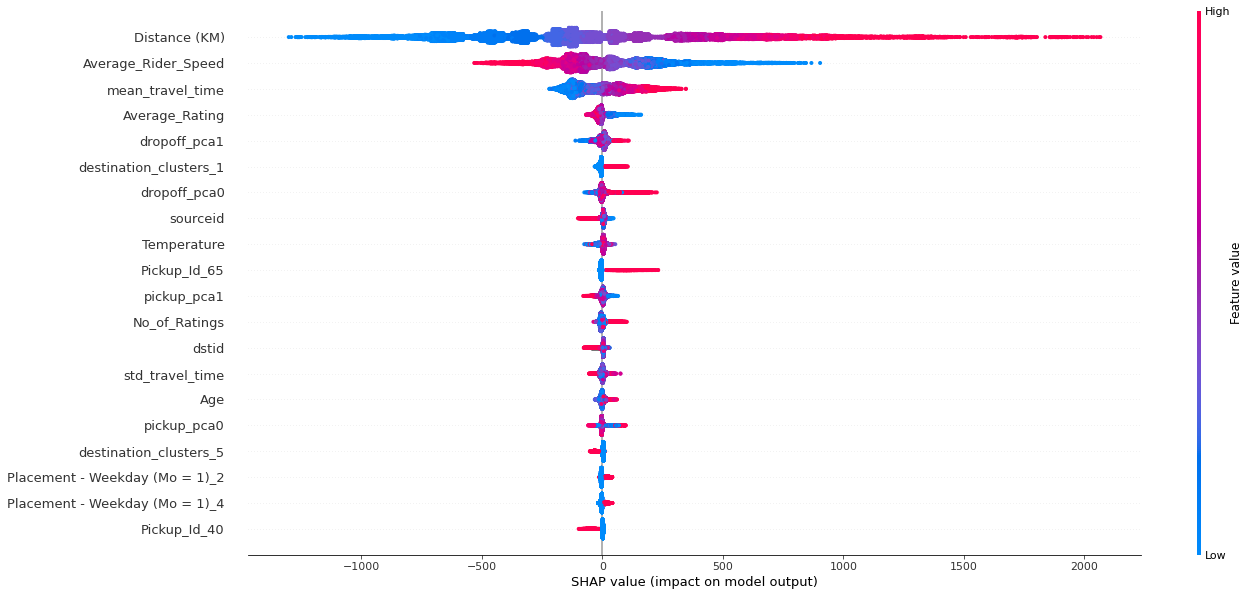

In [43]:
shap.summary_plot(shap_values, X, feature_names=features, plot_size=(20, 10))

In [45]:
ind = 59

In [48]:
shap.force_plot(explainer.expected_value, shap_values[ind,:], X.iloc[ind,:], feature_names=features, link='logit')

In [ ]:
pickle.dump(lgbm_model, open("model_finalized", 'wb'))


## Features importances 

In [78]:
features_indices = []
index = 0
for i in lgbm_optimized.feature_importances_.tolist() : 
    if i > 0.01 : 
        features_indices.append(index)
    index +=1
        
        
        

In [87]:
lgbm_optimized.feature_importances_

array([ 97,  21,  12,  17,  19,  18,  11,  25,  63,  20,   2,  18,  26,
        42,  32, 106,   0,   1,   0,   1,   0,   0,   0,   0,   0,   0,
         3,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   4,   0,   0,   4,   0,   0,   0,
         1,   0,   0,   2,   1,   1,   2,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
        10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [79]:
lgbm_optimized.feature_importances_

array([ 97,  21,  12,  17,  19,  18,  11,  25,  63,  20,   2,  18,  26,
        42,  32, 106,   0,   1,   0,   1,   0,   0,   0,   0,   0,   0,
         3,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   4,   0,   0,   4,   0,   0,   0,
         1,   0,   0,   2,   1,   1,   2,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
        10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

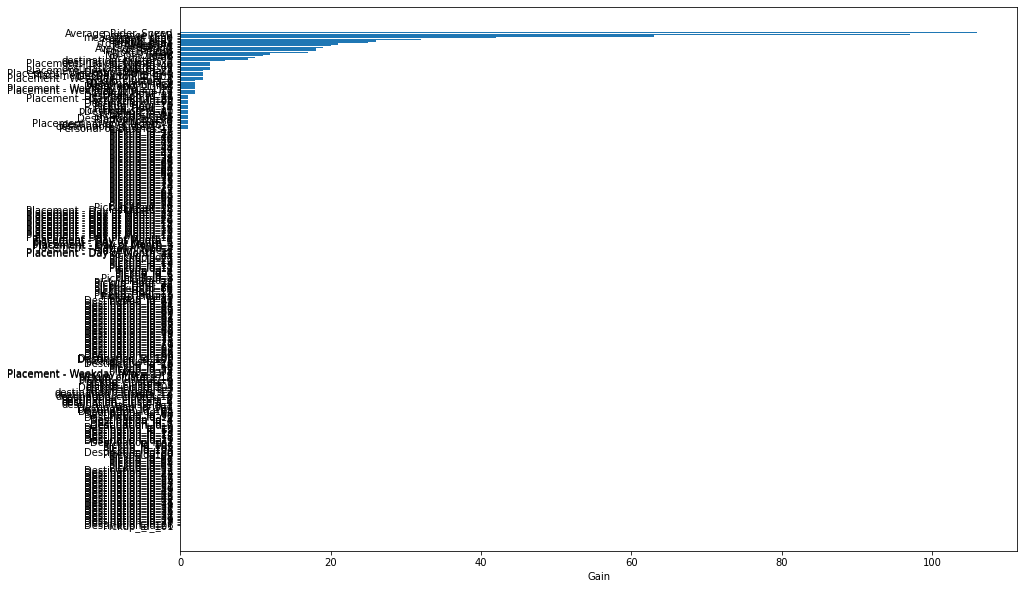

In [80]:
indices = np.argsort(lgbm_optimized.feature_importances_)

features = X.columns

# features importance
indices = np.argsort(lgbm_optimized.feature_importances_)

plt.figure(figsize=(15, 10))
plt.barh(range(len(indices)), lgbm_optimized.feature_importances_[indices], align='center')
plt.xlabel("Gain")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()

## Submissions

In [ ]:
test_csv = pd.read_csv("/Users/patrickmacclenihan/Desktop/final_project/DATA/Test.csv")
orders =pd.DataFrame(test_csv["Order No"].values,columns=["Order No"])

In [ ]:
sumbmission_lgbm = pd.concat([orders , 
           pd.DataFrame(pred, columns=["Time from Pickup to Arrival"])], axis = 1 )


In [ ]:
sumbmission_lgbm.to_csv('/Users/patrickmacclenihan/Desktop/final_project/DATA/submissions/submission_patrick_mac_clenihan2406lgbm.csv', index = False)

In [ ]:
sumbmission2 = pd.concat([pd.DataFrame(df_test["Order No"].values,columns=["Order No"]) , 
           pd.DataFrame(preds, columns=["Time from Pickup to Arrival"])], axis = 1 )

sumbmission2.to_csv('/Users/patrickmacclenihan/Final_Project_Viva_Data_2020/Submissions/submission_patrick_mac_clenihan_xgb.csv', index = False)

In [ ]:
sumbmission2